In [2]:
#importing python libraries 
import numpy as np, pandas as pd
from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns

In [2]:
#representing the dimensionality of the data , by getting some variables, image dimension , the directory for the test images and the path to the weights file.
dim = 512 #1024, 256, 'original'
test_dir = f'/kaggle/input/vinbigdata-{dim}-image-dataset/vinbigdata/test'
weights_dir = '/kaggle/input/vinbigdata-cxr-ad-yolov5-14-class-train/yolov5/runs/train/exp/weights/best.pt'

In [3]:
test_df = pd.read_csv(f'/kaggle/input/vinbigdata-{dim}-image-dataset/vinbigdata/test.csv')
test_df.head()

image_id  width  height
0  83caa8a85e03606cf57e49147d7ac569   2304    2880
1  7550347fa2bb96c2354a3716dfa3a69c   2538    3095
2  74b23792db329cff5843e36efb8aa65a   2788    3120
3  94568a546be103177cb582d3e91cd2d8   1994    2430
4  6da36354fc904b63bc03eb3884e0c35c   2056    2376

# SETTING UP THE DATADSET FOR USE OF YOLOv5 MODEL

In [4]:
#Running the YOLOv5 with specified parameters to detect object in the image 
shutil.copytree('/kaggle/input/yolov5-official-v31-dataset/yolov5', '/kaggle/working/yolov5')
os.chdir('/kaggle/working/yolov5') # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# DETECT OBJECTS IN IMAGES - INFERENCE 

In [5]:
!python detect.py --weights $weights_dir\
--img 640\
--conf 0.01\
--iou 0.4\
--source $test_dir\
--save-txt --save-conf --exist-ok

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.01, device='', exist_ok=True, img_size=640, iou_thres=0.4, name='exp', project='runs/detect', save_conf=True, save_txt=True, source='/kaggle/input/vinbigdata-512-image-dataset/vinbigdata/test', update=False, view_img=False, weights=['/kaggle/input/vinbigdata-cxr-ad-yolov5-14-class-train/yolov5/runs/train/exp/weights/best.pt'])
Fusing layers... 
image 1/3000 /kaggle/input/vinbigdata-512-image-dataset/vinbigdata/test/002a34c58c5b758217ed1f584ccbcfe9.png: 640x640 1 Aortic enlargements, 1 Cardiomegalys, 7 Pleural thickenings, Done. (0.057s)
image 2/3000 /kaggle/input/vinbigdata-512-image-dataset/vinbigdata/test/004f33259ee4aef671c2b95d54e4be68.png: 640x640 2 Aortic enlargements, 1 Calcifications, 2 Pleural thickenings, Done. (0.046s)
image 3/3000 /kaggle/input/vinbigdata-512-image-dataset/vinbigdata/test/008bdde2af2462e86fd373a445d0f4cd.png: 640x640 1 Aortic enlargements, 1 Cardiomegalys, 1 Nodule/Masss, 2 Pleural thic

# Plot

100%|██████████| 16/16 [00:00<00:00, 139.52it/s]


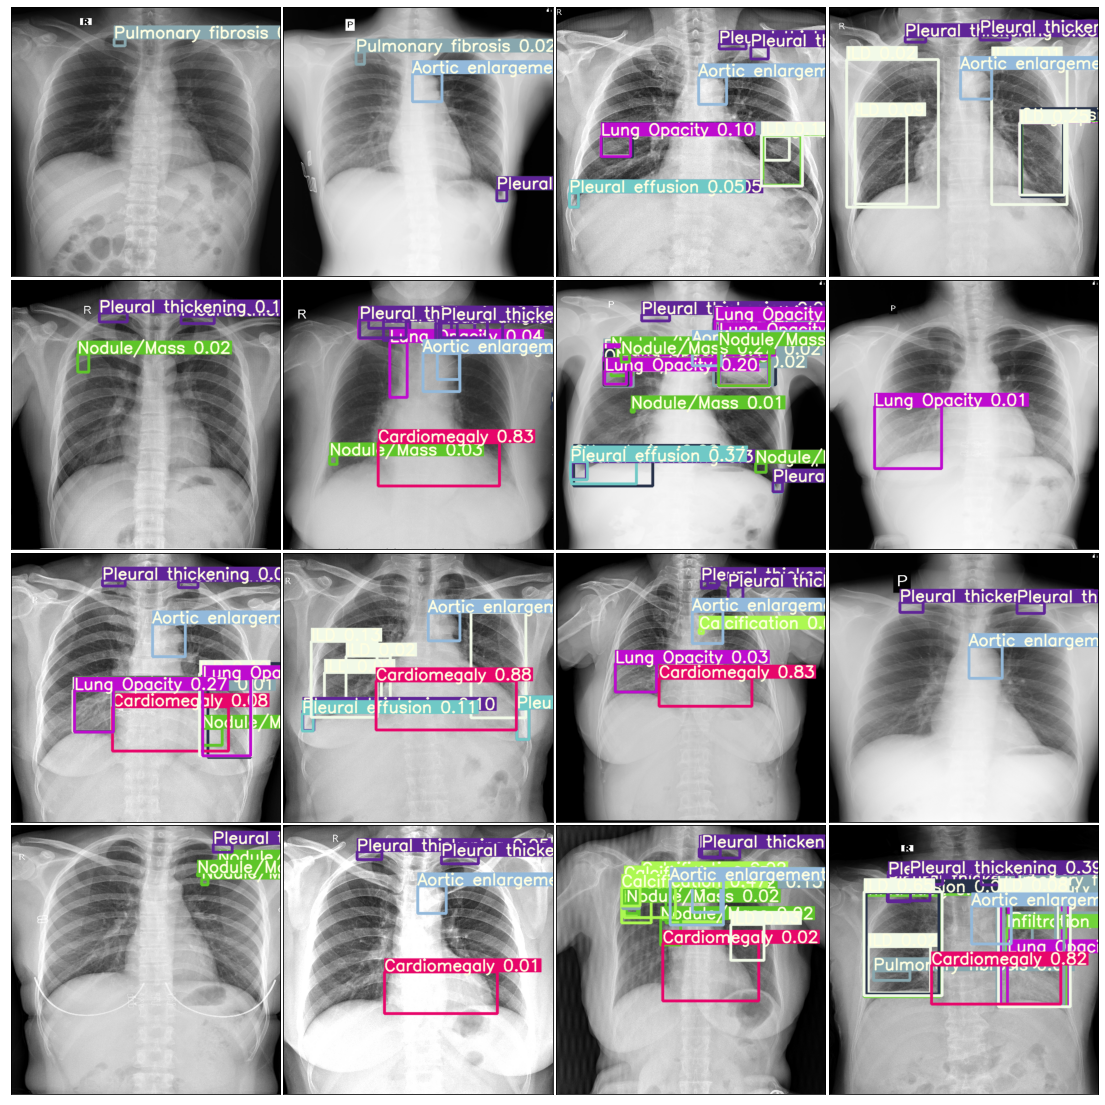

100%|██████████| 16/16 [00:00<00:00, 135.64it/s]


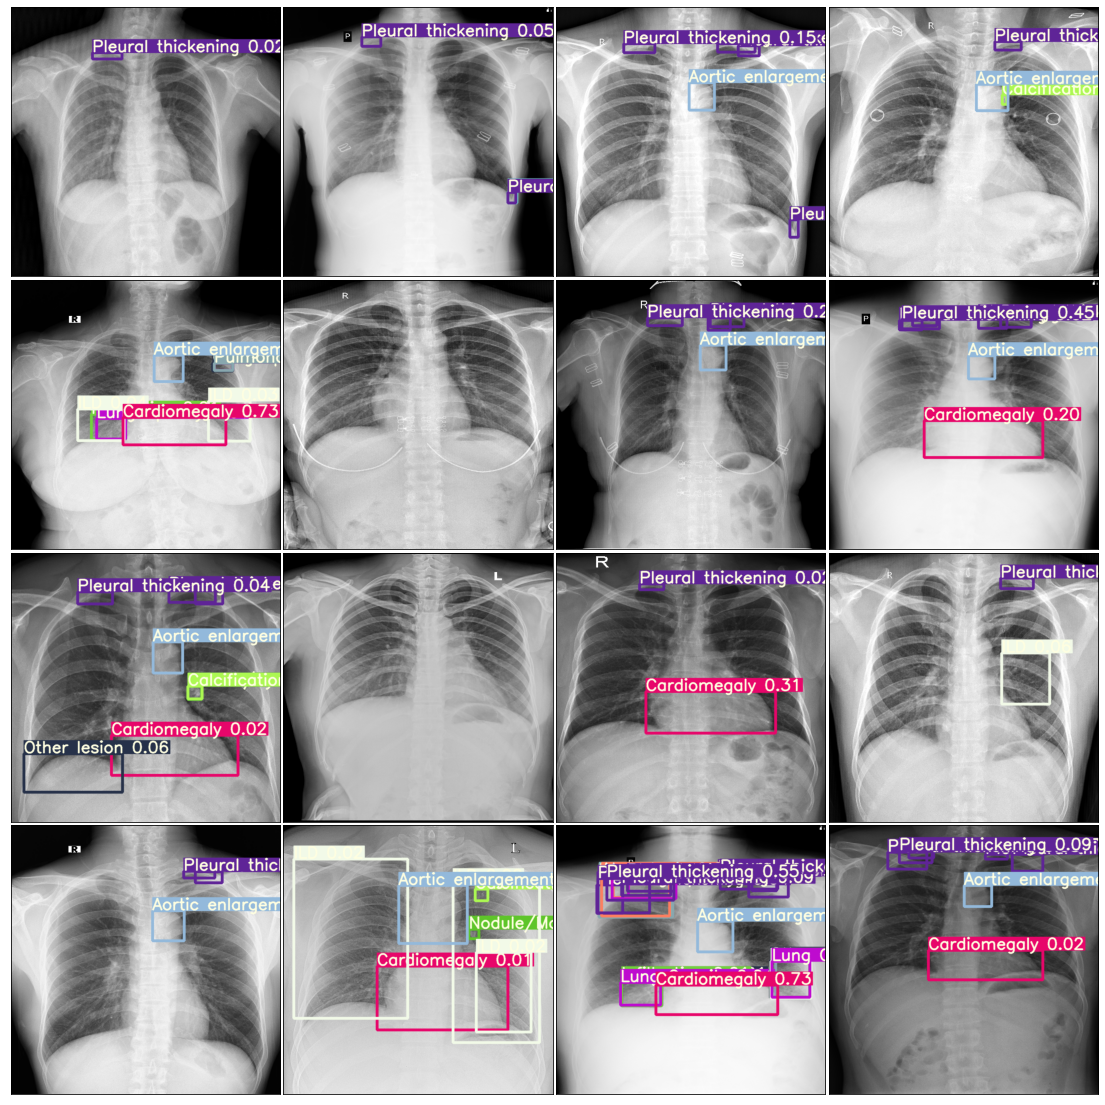

100%|██████████| 16/16 [00:00<00:00, 136.28it/s]


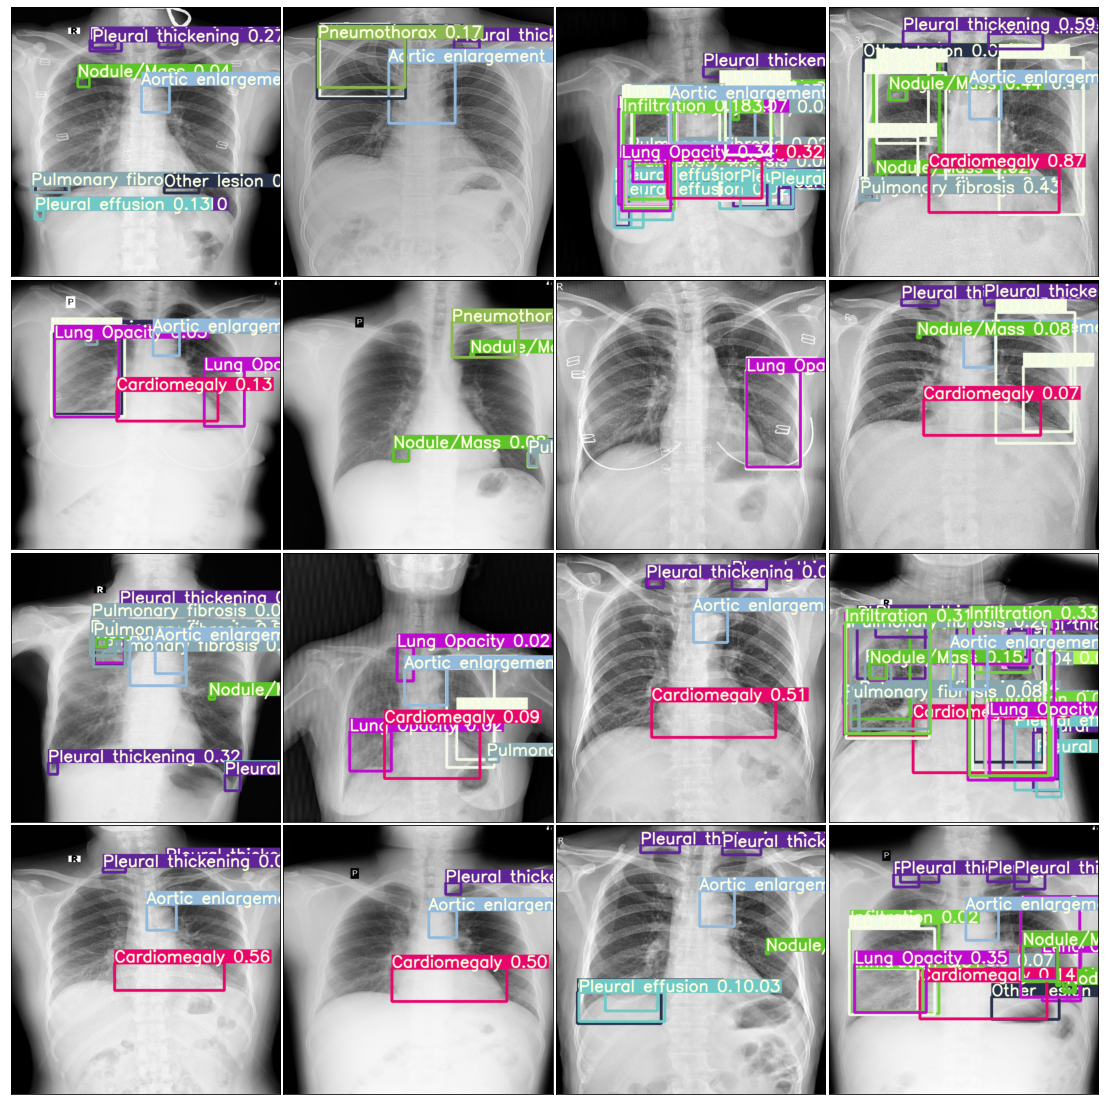

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random
import cv2
from glob import glob
from tqdm import tqdm

files = glob('runs/detect/exp/*png')
for _ in range(3):
    row = 4
    col = 4
    grid_files = random.sample(files, row*col)
    images     = []
    for image_path in tqdm(grid_files):
        img          = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        images.append(img)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(col, row),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()